# Exploratory data analysis

The Exploratory data analysis will only be done on the training data.

## Imports

In [92]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from tqdm import tqdm

## Read the training data

In [2]:
train_df = pd.read_csv('data/train.csv', sep=',', encoding='utf-8')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
len(train_df)

42000

## Target distribution

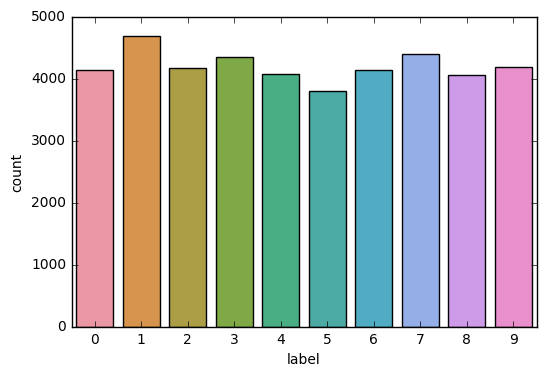

In [89]:
sns.countplot(train_df['label'])
plt.show()

Quite balanced.

## View some images

In [31]:
def dispay_image(row):
    """row is a 1D numpy array of int."""
    plt.imshow(255 - row.reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    plt.show()
    return None

Label: 2


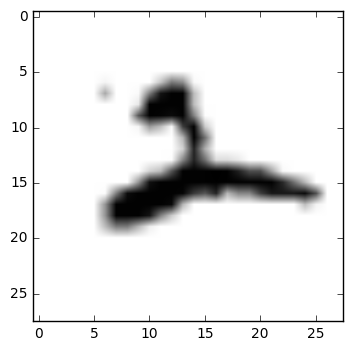

In [87]:
row = train_df.sample(1).iloc[0]
print('Label: {}'.format(row['label']))
row = row.values[1:]
dispay_image(row)